In [1]:
from pyboy import PyBoy, WindowEvent
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import current_tetromino as ct

In [3]:
pyboy = PyBoy("Tetris.gb", game_wrapper=True)

In [4]:
pyboy.set_emulation_speed(5)

In [5]:
tetris = pyboy.game_wrapper()

In [6]:
tetris.start_game()

In [7]:
current = ct.current_tetromino(tetris)

In [12]:
ct.get_shape("L", crop=True)

array([[ True,  True,  True],
       [ True, False, False]])

In [8]:
ct.get_shape(current)

array([[False,  True,  True, False],
       [False,  True,  True, False]])

In [9]:
ct.get_shape(current, crop=True)

array([[ True,  True],
       [ True,  True]])

In [41]:
def get_possibilities(tetris):
    tetro = ct.current_tetromino(tetris)
    binary_game_area = tetris.game_area().base != 47
    binary_game_area[1:3,3:7] = False
    original_shape = ct.get_shape(tetro, crop=True)
    expected_sum = binary_game_area.sum() + original_shape.sum()
    possibilities = []
    for rotation in range(4):
        shape = original_shape.copy()
        for i in range(rotation):
            shape = np.rot90(shape)
        h,w = shape.shape
        for c in range(10 - w + 1):
            best = binary_game_area.copy()
            for r in range(18 - h + 1):
                ga = binary_game_area.copy()
                ga[r:r+h,c:c+w] = np.logical_or(ga[r:r+h,c:c+w], shape)
                if ga.sum() != expected_sum:
                    break
                best = ga
            possibilities.append([best, c, rotation])
    return possibilities

In [42]:
pos = get_possibilities(tetris)

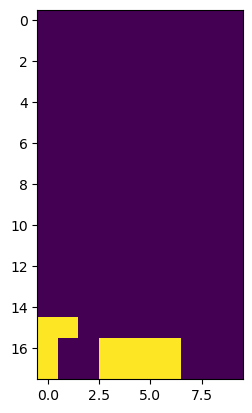

In [39]:
plt.imshow(pos[8][0])

In [40]:
pos[8][1:]

[0, 1]

In [19]:
def play_until_next_tetro(pyboy, tetris):
    while not ct.current_tetromino(tetris):
        pyboy.tick()

In [24]:
[pyboy.tick() for _ in range(60)]
play_until_next_tetro(pyboy, tetris)

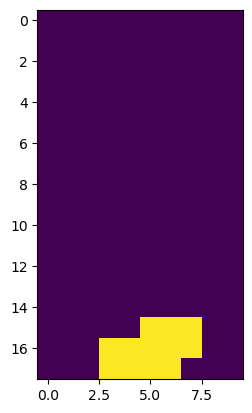

In [44]:
pos = get_possibilities(tetris)
plt.imshow(pos[5][0])